# Classification and PCA

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
#from PIL import Image

C:\Users\ashwi\Anaconda3\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [4]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%5.4f', colors = 'k', fontsize=14, axes=ax)
    return ax 

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

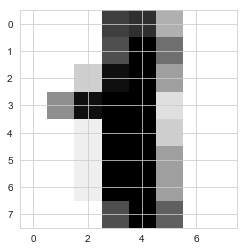

In [7]:
plt.imshow(digits.images[1],cmap='binary',interpolation='nearest')

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [10]:
digits.target[1]

1

In [11]:
type(digits.images)

numpy.ndarray

In [12]:
np.ndarray(shape=(3,2,3))

array([[[1.37962049e-306, 1.24610791e-306, 1.11260959e-306],
        [1.69109959e-306, 9.34603679e-307, 1.42419802e-306]],

       [[1.78019082e-306, 4.45061456e-308, 1.24612081e-306],
        [1.37962049e-306, 9.34597567e-307, 1.29061821e-306]],

       [[1.78019625e-306, 1.11255866e-306, 8.90098127e-307],
        [9.34609790e-307, 3.91792279e-317, 1.17191521e-042]]])

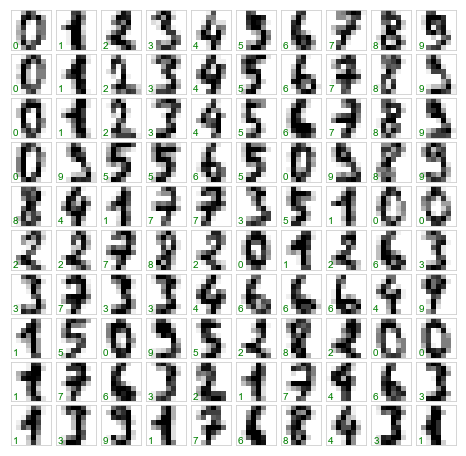

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
sns.set_style('white')
plt.grid(False)
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [22]:
d2d = digits.images.reshape(-1,64)

In [23]:
d2d.shape

(1797, 64)

In [24]:
df = pd.DataFrame(d2d)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [25]:
df.groupby('target').count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178
1,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
2,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177
3,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
4,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
5,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
6,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
7,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
8,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174


In [27]:
dftwo = df[df.target.isin([8,9])]
dftwo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,3.0,16.0,12.0,10.0,14.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,15.0,0.0,0.0,0.0,0.0,13.0,16.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,9.0,10.0,12.0,15.0,2.0,0.0,0.0,0.0,4.0,11.0,10.0,11.0,0.0,0.0,0.0,0.0,1.0,16.0,10.0,1.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,12.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0,8
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,11.0,0.0,0.0,0.0,1.0,4.0,4.0,7.0,16.0,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9
28,0.0,0.0,10.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,13.0,13.0,1.0,0.0,0.0,0.0,8.0,11.0,0.0,14.0,4.0,0.0,0.0,0.0,0.0,13.0,15.0,13.0,0.0,0.0,0.0,1.0,11.0,16.0,16.0,0.0,0.0,0.0,0.0,1.0,15.0,3.0,9.0,10.0,0.0,0.0,0.0,0.0,14.0,6.0,15.0,10.0,0.0,0.0,0.0,0.0,8.0,14.0,7.0,1.0,0.0,0.0,8


In [28]:
dftwo.shape

(354, 65)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
itrain,itest = train_test_split(range(dftwo.shape[0]),train_size = 0.6)
set1 = {}
set1['Xtrain'] = dftwo[list(range(64))].iloc[itrain, :]
set1['Xtest'] = dftwo[list(range(64))].iloc[itest, :]
set1['ytrain'] = dftwo.target.iloc[itrain]==8
set1['ytest'] = dftwo.target.iloc[itest]==8

In [31]:
clf = LogisticRegression(C=100000)
clf.fit(set1['Xtrain'], set1['ytrain'])
clf.score(set1['Xtest'], set1['ytest'])

0.971830985915493

In [42]:
from sklearn.model_selection import GridSearchCV
def cv_optimize(clf,parameters,Xtrain,ytain,n_folds = 5,scoring = None):
    if not scoring:
        gs = GridSearchCV(clf,param_grid = parameters,cv = n_folds)
    else:
        gs = GridSearchCV(clf,param_grid = parameters,cv = n_folds,scoring = scoring)
    gs.fit(Xtrain,ytain)
    print('Best Paramater :',gs.best_params_)
    return gs

In [43]:
def classify_with_sets(clf, parameters, sets, n_folds = 5, scoring=None):
    Xtrain, Xtest, ytrain, ytest = sets['Xtrain'], sets['Xtest'], sets['ytrain'], sets['ytest']
    gs = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, scoring=scoring)
    training_score = gs.score(Xtrain, ytrain)
    test_score = gs.score(Xtest, ytest)
    print("Score on training data: %0.2f" % (training_score))
    print("Score on test data:     %0.2f" % (test_score))
    return gs

In [44]:
def classify_from_dataframe(clf, parameters, indf, featurenames, targetname, target1val, n_folds=5, standardize=False, train_size=0.6, scoring=None):
    subdf=indf[featurenames]
    y=(indf[targetname].values==target1val)*1
    itrain, itest = train_test_split(range(subdf.shape[0]), train_size=train_size)
    inset = {}
    if standardize:
        Xtr = (subdf.iloc[itrain] - subdf.iloc[itrain].mean())/subdf.iloc[itrain].std()
        inset['Xtrain'] = Xtr.values
        Xte = (subdf.iloc[itest] - subdf.iloc[itest].mean())/subdf.iloc[itest].std()
        inset['Xtest'] = Xte.values
    else:
        inset['Xtrain'] = subdf.iloc[itrain].values
        inset['Xtest'] = subdf.iloc[itest].values
    inset['ytrain'] = y[itrain]
    inset['ytest'] = y[itest]
    clf = classify_with_sets(clf, parameters, inset, n_folds=n_folds, scoring=scoring)
    return clf, inset['Xtrain'], inset['ytrain'], inset['Xtest'], inset['ytest']
    


In [45]:
cvals = [1e-20, 1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 10, 100, 10000, 100000]

In [46]:
digitstwo_log_set1 = classify_with_sets(
    LogisticRegression(), 
    {"C": cvals},  
    set1,
n_folds=5) 

Best Paramater : {'C': 0.1}
Score on training data: 1.00
Score on test data:     0.99


C:\Users\ashwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(set1['ytest'], clf.predict(set1['Xtest']))

array([[68,  1],
       [ 3, 70]], dtype=int64)

In [48]:
confusion_matrix(set1['ytest'], digitstwo_log_set1.predict(set1['Xtest']))

array([[68,  1],
       [ 1, 72]], dtype=int64)

In [49]:
# your code here
set2={}
digitstwo_log_set2, set2['Xtrain'], set2['ytrain'], set2['Xtest'], set2['ytest'] = classify_from_dataframe(
    LogisticRegression(), 
    {"C": cvals}, 
    dftwo, 
    list(range(64)), 
    'target', 8, 
n_folds=5) 

Best Paramater : {'C': 0.1}
Score on training data: 1.00
Score on test data:     0.99


C:\Users\ashwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
confusion_matrix(set2['ytest'], digitstwo_log_set2.predict(set2['Xtest']))

array([[74,  0],
       [ 1, 67]], dtype=int64)

In [51]:
confusion_matrix(set1['ytest'], digitstwo_log_set2.predict(set1['Xtest']))

array([[69,  0],
       [ 1, 72]], dtype=int64)

In [52]:
def plot_scores(fitmodel, pname):
    params = [d[pname] for d in fitmodel.cv_results_['params']]
    scores = fitmodel.cv_results_['mean_test_score']
    stds = fitmodel.cv_results_['std_test_score']
    plt.plot(params, scores,'.-');
    plt.fill_between(params, scores - stds, scores + stds, alpha=0.3);

(0.6, 1)

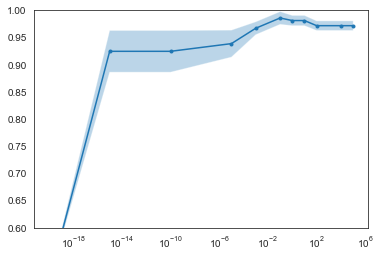

In [53]:
plot_scores(digitstwo_log_set2, 'C')
plt.xscale('log')
plt.ylim(0.6,1)

(0.6, 1)

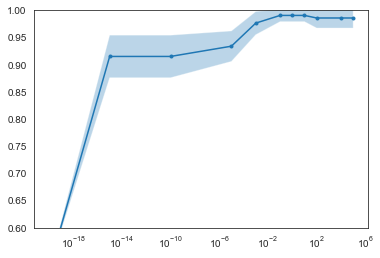

In [54]:
plot_scores(digitstwo_log_set1, 'C')
plt.xscale('log')
plt.ylim(0.6,1)

In [55]:
from sklearn.decomposition import PCA

In [82]:
pca_digits = PCA()
X2 = pca_digits.fit_transform(dftwo[list(range(64))])

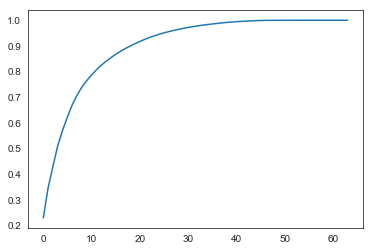

In [87]:
plt.plot(list(range(64)),np.cumsum(pca_digits.explained_variance_ratio_))

In [88]:
pca_digits = PCA(n_components=16)
X2 = pca_digits.fit_transform(dftwo[list(range(64))])

In [89]:
X2

array([[  8.10074916, -12.64316361,  -9.83186365, ...,  -6.39622448,
          2.91430606,   3.03393189],
       [ -7.78776559,  -2.39012062,   1.23238419, ...,  -1.78805575,
          6.7640055 ,   1.98202634],
       [ 19.46405435,  -1.87676635,  18.32405879, ...,  -4.28825415,
          0.26444744,  -3.05586919],
       ...,
       [ 21.77086235,  -1.9423298 ,  -9.28004666, ...,   7.83680897,
          0.35154329,   0.67955995],
       [-10.3206343 ,   5.12417443, -11.60536506, ...,  -4.9529466 ,
          4.10884209,  -1.99159556],
       [  6.03537496, -13.5593368 , -10.46292768, ...,  10.20194107,
          1.36981176,  -1.89405026]])

In [90]:
print(pca_digits.explained_variance_ratio_.sum())

0.8674199531492719


In [91]:
100*pca_digits.explained_variance_ratio_

array([23.00052155, 11.765007  ,  8.34864885,  8.09763762,  5.97655574,
        5.17744746,  4.71192878,  3.76858281,  3.12659485,  2.51728187,
        2.22388241,  1.9821117 ,  1.8017826 ,  1.50450989,  1.42841532,
        1.31108685])

In [95]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=8*8
    g=pc.components_[j][0:size]
    g=normit(g)
    return g
def display_component(pc, j):
    g = getNC(pc,j)
    print(g.shape)
    plt.imshow(g.reshape(8,8),cmap='binary')
    plt.xticks([])
    plt.yticks([])

(64,)


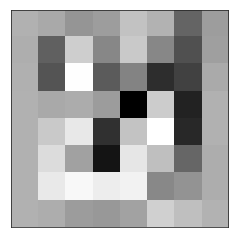

In [100]:
display_component(pca_digits, 15)

In [101]:
dfpca = pd.DataFrame({"target":dftwo.target})
for i in range(pca_digits.explained_variance_ratio_.shape[0]):
    dfpca["pc%i" % (i+1)] = X2[:,i]
dfpca.head()

,target,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
8,8,8.100749,-12.643164,-9.831864,6.692871,-3.471527,3.722768,-10.171100,8.775908,1.380974,-0.662946,1.901084,2.374823,1.013113,-6.396224,2.914306,3.033932
9,9,-7.787766,-2.390121,1.232384,0.226784,-6.408476,19.245410,1.592424,-8.484930,8.525914,10.055121,-1.900405,0.161894,5.406795,-1.788056,6.764006,1.982026
18,8,19.464054,-1.876766,18.324059,7.806491,8.306177,-2.014978,-4.623936,-2.192764,2.550730,7.417850,-3.131096,-0.202411,-2.599265,-4.288254,0.264447,-3.055869
19,9,-17.184131,-10.020684,7.893574,18.052571,12.480299,8.260674,11.657183,4.071840,-4.245667,-1.840670,0.887761,-1.153710,5.404469,6.314952,1.121171,-3.331985
28,8,17.409815,-4.833887,0.694249,8.513341,-5.006003,7.247761,-9.893737,6.411986,9.152888,4.721105,2.157310,-3.184879,-5.303092,-1.991405,2.337659,-0.688857


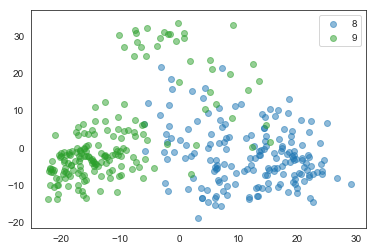

In [102]:
colors = [c0, c2]
for label, color in zip(dfpca['target'].unique(), colors):
    mask = dfpca['target']==label
    plt.scatter(dfpca[mask]['pc1'], dfpca[mask]['pc2'], c=color, label=label, alpha=0.5)
plt.legend()

In [103]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [104]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%5.4f', colors = 'k', fontsize=14, axes=ax)
    return ax 

Best Paramater : {'C': 1}
Score on training data: 0.92
Score on test data:     0.90


C:\Users\ashwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


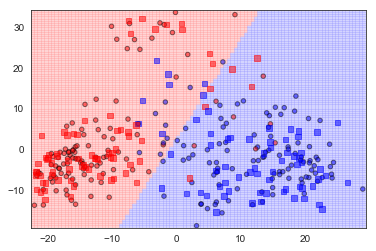

In [106]:
# your code here
setf={}
digitspca_log2, setf['Xtrain'], setf['ytrain'], setf['Xtest'], setf['ytest']  = classify_from_dataframe(
    LogisticRegression(), 
    {"C": cvals}, 
    dfpca, 
    ['pc1','pc2'], 
    'target', 8, 
n_folds=5) 
plt.figure()
ax=plt.gca()
points_plot(ax, setf['Xtrain'], setf['Xtest'], setf['ytrain'], setf['ytest'], digitspca_log2, alpha=0.5, psize=20);

C:\Users\ashwi\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'axes'
  s)
C:\Users\ashwi\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'axes'
  s)


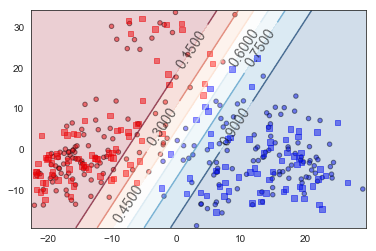

In [107]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax,  setf['Xtrain'], setf['Xtest'], setf['ytrain'], setf['ytest'], digitspca_log2, alpha=0.5, psize=20);

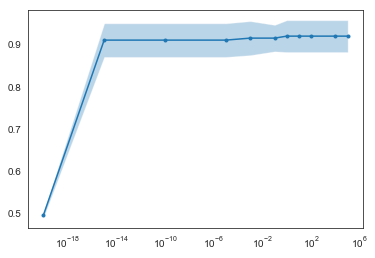

In [108]:
plot_scores(digitspca_log2, 'C')
plt.xscale('log')

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(setf['ytest'], digitspca_log2.predict(setf['Xtest']), )

array([[69,  6],
       [ 8, 59]], dtype=int64)